In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

In [4]:
trade201904 = pd.read_csv("/Users/jaeyoungcho/Desktop/2020 금융 빅데이터 챌린지-공모전데이터/데이터/비씨카드/거래내역_201904.csv", sep=",", encoding="CP949")
trade201905 = pd.read_csv("/Users/jaeyoungcho/Desktop/2020 금융 빅데이터 챌린지-공모전데이터/데이터/비씨카드/거래내역_201905.csv", sep=",", encoding="CP949")
trade202004 = pd.read_csv("/Users/jaeyoungcho/Desktop/2020 금융 빅데이터 챌린지-공모전데이터/데이터/비씨카드/거래내역_202004.csv", sep=",", encoding="CP949")
trade202005 = pd.read_csv("/Users/jaeyoungcho/Desktop/2020 금융 빅데이터 챌린지-공모전데이터/데이터/비씨카드/거래내역_202005.csv", sep=",", encoding="CP949")
trade_online = pd.read_excel("/Users/jaeyoungcho/Desktop/2020 금융 빅데이터 챌린지-공모전데이터/데이터/비씨카드/온라인구매품목.xlsx", sep=",", encoding="CP949")

In [5]:
trade201904

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20190401,6654,14688,1995,25,M,5,9998,NaN,128180
1,20190401,6654,14688,1998,20,F,5,9998,NaN,14620
2,20190401,6654,14697,1999,20,M,5,9998,NaN,32000
3,20190401,6654,14699,1960,60,F,5,9998,NaN,17588
4,20190401,6654,14699,1990,30,F,5,9998,NaN,41463
...,...,...,...,...,...,...,...,...,...,...
1048570,20190416,52829,52829,1968,50,M,9,4020,NaN,15440
1048571,20190416,52831,52831,1979,40,F,5,4010,NaN,5273
1048572,20190416,52831,52831,1981,35,M,5,4010,NaN,9707
1048573,20190416,52853,52853,1988,30,F,9,5123,NaN,228333


In [6]:
trade201905

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20190501,18569,18569,1976,40,M,9,4010,NaN,32482
1,20190501,18591,18591,1974,45,M,5,4010,NaN,13185
2,20190501,18600,18591,1978,40,F,9,4004,NaN,43613
3,20190501,18603,18603,1981,35,M,9,4020,NaN,18868
4,20190501,17516,17516,1997,20,F,9,4010,NaN,9924
...,...,...,...,...,...,...,...,...,...,...
1048570,20190514,13606,14619,1976,40,F,5,9153,NaN,103467
1048571,20190514,13606,14620,1964,55,F,5,9153,NaN,106097
1048572,20190514,13606,14621,1958,60,F,5,9153,NaN,70097
1048573,20190514,13606,14633,1994,25,F,5,9153,NaN,196167


In [7]:
trade202004

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20200401,4517,46993,1966,55,F,5,4076,0,43733
1,20200401,48069,48069,1990,30,M,9,4010,0,6167
2,20200401,14748,14748,1982,35,F,9,4010,0,10933
3,20200401,37558,37558,1980,40,F,5,4020,0,39453
4,20200401,4130,4129,1985,35,F,5,4020,0,27223
...,...,...,...,...,...,...,...,...,...,...
1048570,20200423,4548,8018,1963,55,F,5,9998,0,300
1048571,20200423,4548,16295,1975,45,F,7,9998,0,300
1048572,20200423,4548,48103,1965,55,M,5,9998,0,300
1048573,20200423,4548,28124,1981,40,M,5,9998,0,300


In [8]:
trade202005

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20200501,58012,58006,1981,40,F,9,4020,0,16070
1,20200501,17027,17027,1973,45,M,9,4020,0,28823
2,20200501,47585,47585,1971,50,M,9,4020,0,2400
3,20200501,11812,11812,1986,35,M,9,4004,0,15230
4,20200501,12771,12771,1984,35,F,9,4010,0,10800
...,...,...,...,...,...,...,...,...,...,...
1048570,20200522,15015,15015,1988,30,M,5,4010,0,8573
1048571,20200522,39196,39196,1960,60,F,9,4020,0,13150
1048572,20200522,48106,48109,1968,50,F,5,4004,0,39285
1048573,20200522,37558,37558,1968,50,F,9,4020,0,12743


In [9]:
trade_online

,기준년월,연령코드,성별코드,소분류코드,소분류명,총매출건수,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,201905,50,남성,171110,자동차기기/용품/서비스,942,NaN,NaN,NaN,NaN
1,201905,35,여성,201413,원예,378,NaN,NaN,NaN,NaN
2,201905,35,여성,101410,스포츠의류,5070,NaN,NaN,NaN,NaN
3,201905,35,여성,191014,유모차,621,NaN,NaN,NaN,NaN
4,201905,60,여성,101410,스포츠의류,674,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
25747,202007,20,남성,191010,기저귀,24,NaN,NaN,NaN,NaN
25748,202007,30,남성,151015,식기세척/건조기,34,NaN,NaN,NaN,NaN
25749,202007,55,남성,991113,기타금융상품(보험),7,NaN,NaN,NaN,NaN
25750,202007,70,남성,101014,여성스커트,7,NaN,NaN,NaN,NaN


# 201904~202005 까지의 데이터는 갯수를 맞춰서 잘라준 듯하다.
# 가맹점업종코드는 ㅅㅂ럼이 어떻게 처보라는거야

# 기본적인 NaN값, 중복값 조회 및 수정해야겠다.

In [10]:
temp201904 = copy.copy(trade201904)
temp201904['할부개월수'].unique()

array([nan,  2.,  3.,  6.])

In [11]:
temp201904 = temp201904.drop(columns='할부개월수')
temp201904.isnull().sum()

기준일자        0
가맹점신우편번호    0
고객신우편번호     0
생년          0
연령대코드       0
성별코드        0
매출구분코드      0
가맹점업종코드     0
매출금액        0
dtype: int64

In [12]:
temp201905 = copy.copy(trade201905)
temp201905['할부개월수'].unique()

array([nan,  3.,  6.])

In [13]:
temp201905 = temp201905.drop(columns='할부개월수')
temp201905.isnull().sum()

기준일자        0
가맹점신우편번호    0
고객신우편번호     0
생년          0
연령대코드       0
성별코드        0
매출구분코드      0
가맹점업종코드     0
매출금액        0
dtype: int64

In [14]:
temp202004 = copy.copy(trade202004)
temp202004['할부개월수'].unique()

array([0, 6, 3, 2])

In [15]:
temp202004.isnull().sum()

기준일자        0
가맹점신우편번호    0
고객신우편번호     0
생년          0
연령대코드       0
성별코드        0
매출구분코드      0
가맹점업종코드     0
할부개월수       0
매출금액        0
dtype: int64

In [16]:
temp202005 = copy.copy(trade202005)
temp202005['할부개월수'].unique()

array([0, 3, 6, 2, 5])

In [17]:
temp202005.isnull().sum()

기준일자        0
가맹점신우편번호    0
고객신우편번호     0
생년          0
연령대코드       0
성별코드        0
매출구분코드      0
가맹점업종코드     0
할부개월수       0
매출금액        0
dtype: int64

In [18]:
trade_online = trade_online.drop(columns=trade_online.columns[6:])

In [19]:
trade_online.isnull().sum()

기준년월      0
연령코드      0
성별코드      0
소분류코드     0
소분류명     24
총매출건수     0
dtype: int64

In [20]:
trade_online.dropna(inplace=True)
trade_online.isnull().sum()

기준년월     0
연령코드     0
성별코드     0
소분류코드    0
소분류명     0
총매출건수    0
dtype: int64

# 201904 데이터를 시각화해서 상관관계를 보자

In [21]:
trade_online

,기준년월,연령코드,성별코드,소분류코드,소분류명,총매출건수
0,201905,50,남성,171110,자동차기기/용품/서비스,942
1,201905,35,여성,201413,원예,378
2,201905,35,여성,101410,스포츠의류,5070
3,201905,35,여성,191014,유모차,621
4,201905,60,여성,101410,스포츠의류,674
...,...,...,...,...,...,...
25747,202007,20,남성,191010,기저귀,24
25748,202007,30,남성,151015,식기세척/건조기,34
25749,202007,55,남성,991113,기타금융상품(보험),7
25750,202007,70,남성,101014,여성스커트,7


In [22]:
temp202005

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20200501,58012,58006,1981,40,F,9,4020,0,16070
1,20200501,17027,17027,1973,45,M,9,4020,0,28823
2,20200501,47585,47585,1971,50,M,9,4020,0,2400
3,20200501,11812,11812,1986,35,M,9,4004,0,15230
4,20200501,12771,12771,1984,35,F,9,4010,0,10800
...,...,...,...,...,...,...,...,...,...,...
1048570,20200522,15015,15015,1988,30,M,5,4010,0,8573
1048571,20200522,39196,39196,1960,60,F,9,4020,0,13150
1048572,20200522,48106,48109,1968,50,F,5,4004,0,39285
1048573,20200522,37558,37558,1968,50,F,9,4020,0,12743


In [23]:
sex = {"M":1, "F":0}
temp201904.replace(sex, inplace=True)
temp201904

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,20190401,6654,14688,1995,25,1,5,9998,128180
1,20190401,6654,14688,1998,20,0,5,9998,14620
2,20190401,6654,14697,1999,20,1,5,9998,32000
3,20190401,6654,14699,1960,60,0,5,9998,17588
4,20190401,6654,14699,1990,30,0,5,9998,41463
...,...,...,...,...,...,...,...,...,...
1048570,20190416,52829,52829,1968,50,1,9,4020,15440
1048571,20190416,52831,52831,1979,40,0,5,4010,5273
1048572,20190416,52831,52831,1981,35,1,5,4010,9707
1048573,20190416,52853,52853,1988,30,0,9,5123,228333


In [24]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(temp201904)
output = min_max_scaler.transform(temp201904)
output = pd.DataFrame(output, columns=temp201904.columns, index=list(temp201904.index.values))
output

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,0.0,0.090227,0.218492,0.867470,0.250000,1.0,0.0,1.000000,0.001598
1,0.0,0.090227,0.218492,0.903614,0.166667,0.0,0.0,1.000000,0.000182
2,0.0,0.090227,0.218636,0.915663,0.166667,1.0,0.0,1.000000,0.000399
3,0.0,0.090227,0.218668,0.445783,0.833333,0.0,0.0,1.000000,0.000219
4,0.0,0.090227,0.218668,0.807229,0.333333,0.0,0.0,1.000000,0.000517
...,...,...,...,...,...,...,...,...,...
1048570,1.0,0.827352,0.827355,0.542169,0.666667,1.0,1.0,0.335556,0.000192
1048571,1.0,0.827384,0.827387,0.674699,0.500000,0.0,0.0,0.334445,0.000065
1048572,1.0,0.827384,0.827387,0.698795,0.416667,1.0,0.0,0.334445,0.000121
1048573,1.0,0.827735,0.827738,0.783133,0.333333,0.0,1.0,0.458153,0.002848


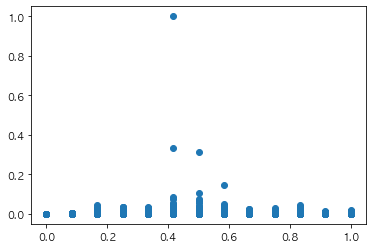

In [25]:
plt.scatter(output['연령대코드'], output['매출금액'])
plt.show()

# 업종코드로 나눠서 더 세분화하여 봐야할 듯

In [26]:
temp_19 = pd.concat((temp201904,temp201905), axis = 0)
temp_20 = pd.concat((temp202004,temp202005), axis = 0)

In [27]:
temp_19.reset_index(drop=True,inplace = True)
temp_20.reset_index(drop=True,inplace = True)

In [28]:
temp_19

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,20190401,6654,14688,1995,25,1,5,9998,128180
1,20190401,6654,14688,1998,20,0,5,9998,14620
2,20190401,6654,14697,1999,20,1,5,9998,32000
3,20190401,6654,14699,1960,60,0,5,9998,17588
4,20190401,6654,14699,1990,30,0,5,9998,41463
...,...,...,...,...,...,...,...,...,...
2097145,20190514,13606,14619,1976,40,F,5,9153,103467
2097146,20190514,13606,14620,1964,55,F,5,9153,106097
2097147,20190514,13606,14621,1958,60,F,5,9153,70097
2097148,20190514,13606,14633,1994,25,F,5,9153,196167


In [29]:
temp_20

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20200401,4517,46993,1966,55,F,5,4076,0,43733
1,20200401,48069,48069,1990,30,M,9,4010,0,6167
2,20200401,14748,14748,1982,35,F,9,4010,0,10933
3,20200401,37558,37558,1980,40,F,5,4020,0,39453
4,20200401,4130,4129,1985,35,F,5,4020,0,27223
...,...,...,...,...,...,...,...,...,...,...
2097145,20200522,15015,15015,1988,30,M,5,4010,0,8573
2097146,20200522,39196,39196,1960,60,F,9,4020,0,13150
2097147,20200522,48106,48109,1968,50,F,5,4004,0,39285
2097148,20200522,37558,37558,1968,50,F,9,4020,0,12743


In [ ]:
temp_19

In [41]:
for x in temp_20.columns.tolist():
    if x not in temp_19.columns.tolist():
        print(x)

할부개월수


# 매출금액 예상
> 기대효과 : 매출금액 예출 높은 사람에게 더 좋은 카드, 더 좋은 혜택을 통해 기존 회원들의 이탈을 방지할 수 있음.

> 2019년의 데이터를 이용해 2020년의 데이터를 예측할 예정

> 19년도 매출금액을 7등급으로 나누고 replace

> 해당 데이터 내에서 train,test 로 나눠 정확도 값 확인

> 적절한 정확도가 나오면 이후 20년도 에 적용

> 같은 feature 들로 20년도 데이터에도 정확도 확인

<BarContainer object of 155938 artists>

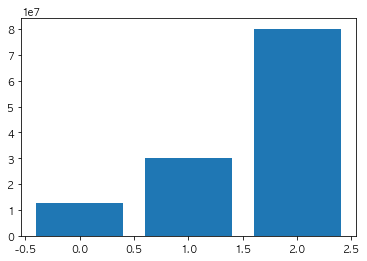

In [87]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

km.fit(temp_19['매출금액'].unique().reshape(-1,1))

cluster3 = dict(zip(temp_19['매출금액'].unique(),km.labels_))

plt.bar(km.labels_,temp_19['매출금액'].unique())

<BarContainer object of 155938 artists>

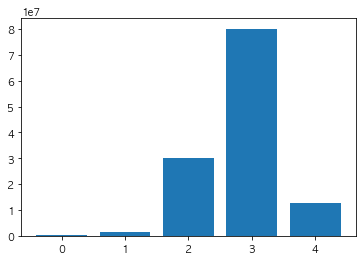

In [88]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)

km.fit(temp_19['매출금액'].unique().reshape(-1,1))

cluster5 = dict(zip(temp_19['매출금액'].unique(),km.labels_))

plt.bar(km.labels_,temp_19['매출금액'].unique())

<BarContainer object of 155938 artists>

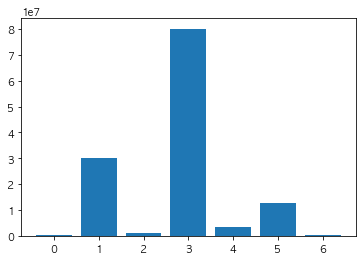

In [89]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7)

km.fit(temp_19['매출금액'].unique().reshape(-1,1))

cluster7 = dict(zip(temp_19['매출금액'].unique(),km.labels_))

plt.bar(km.labels_,temp_19['매출금액'].unique())

<BarContainer object of 155938 artists>

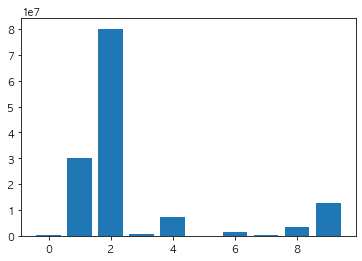

In [90]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)

km.fit(temp_19['매출금액'].unique().reshape(-1,1))

cluster10 = dict(zip(temp_19['매출금액'].unique(),km.labels_))

plt.bar(km.labels_,temp_19['매출금액'].unique())

In [ ]:
temp_19['매출금액'].replace(cluster10,inplace = True)

In [ ]:
temp_19

In [ ]:
from sklearn.model_selections import train_test_split


In [47]:
temp_20

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20200401,4517,46993,1966,55,F,5,4076,0,43733
1,20200401,48069,48069,1990,30,M,9,4010,0,6167
2,20200401,14748,14748,1982,35,F,9,4010,0,10933
3,20200401,37558,37558,1980,40,F,5,4020,0,39453
4,20200401,4130,4129,1985,35,F,5,4020,0,27223
...,...,...,...,...,...,...,...,...,...,...
2097145,20200522,15015,15015,1988,30,M,5,4010,0,8573
2097146,20200522,39196,39196,1960,60,F,9,4020,0,13150
2097147,20200522,48106,48109,1968,50,F,5,4004,0,39285
2097148,20200522,37558,37558,1968,50,F,9,4020,0,12743
